In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t, iqr 
import functions

ModuleNotFoundError: No module named 'functions'

In [53]:
#checking head, tail and shape of the df
leukemia_df = pd.read_csv("Leukemia_GSE63270.csv")
display(leukemia_df.head())
display(leukemia_df.tail())
print("This is the shape of leukemia_df: ", leukemia_df.shape)

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,800,normal,5.931912,8.392398,4.920357,7.736547,3.573632,9.829964,6.884182,4.460609,...,12.962624,12.487750,14.135714,13.907042,13.319509,8.338125,10.886329,3.110830,3.961124,3.304741
1,801,normal,6.380280,8.323990,4.530070,7.974131,3.586820,9.618360,6.493603,4.329404,...,12.413454,11.895042,13.788873,13.445914,12.911385,8.170119,10.611425,3.055663,3.883478,3.457585
2,802,normal,5.932934,7.122286,5.262029,8.114709,3.544446,9.944603,6.697071,4.137536,...,13.043093,12.534802,14.059190,13.861394,11.202704,5.831547,7.429013,3.089047,3.578292,3.474241
3,804,normal,5.244537,8.045917,4.925273,7.480720,3.442437,9.000486,6.811556,4.073076,...,12.201631,11.722233,13.493772,13.234765,10.676298,5.392892,7.574076,3.135462,3.733361,3.692536
4,805,normal,5.699076,8.606159,4.860393,7.735289,3.452540,9.489266,7.223656,4.036533,...,12.539572,11.946368,13.947137,13.735116,13.016269,7.526488,10.170549,3.001784,3.612514,3.291216


,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
96,899,AML,5.465243,6.745156,4.708246,8.526713,3.421915,10.434257,6.907851,4.025988,...,12.661574,12.298361,14.225776,14.020674,9.520286,4.861935,6.470066,3.019684,3.582879,3.607780
97,900,AML,5.724917,6.345032,4.825745,8.838513,3.375445,10.780957,7.202143,3.913865,...,12.414578,11.964833,14.229790,13.932529,9.572719,4.914898,6.403735,2.916867,3.721884,3.248286
98,901,AML,5.950314,6.266336,4.989613,8.336614,3.503616,9.765917,7.177886,4.020722,...,12.527592,12.140116,14.160433,13.992584,10.334985,5.235110,7.271314,3.030144,3.756870,3.342873
99,902,AML,6.166251,6.162653,5.414927,7.986954,3.334282,10.011242,7.949218,4.212638,...,12.943350,12.561686,14.358292,14.178204,13.218093,6.962081,9.872461,3.113189,3.615684,3.260179
100,903,AML,6.370095,6.198633,5.275000,7.986698,3.333128,10.515759,7.544909,3.968101,...,12.751319,12.212706,14.290009,14.014036,12.735673,6.080006,8.875709,2.923123,3.609150,3.373141


This is the shape of leukemia_df:  (101, 54677)


In [54]:
leukemia_melt = pd.melt(leukemia_df, id_vars = ['samples','type'],var_name = 'gene', value_name = 'expression')
leukemia_melt = leukemia_melt.sort_values('samples')
display(leukemia_melt)

,samples,type,gene,expression
0,800,normal,1007_s_at,5.931912
4482885,800,normal,235136_at,4.311945
4715791,800,normal,237442_at,5.911705
806384,800,normal,1565762_at,5.203081
3780329,800,normal,228175_at,5.729671
...,...,...,...,...
1481669,903,AML,205222_at,5.084281
4040504,903,AML,230750_at,4.640845
2433695,903,AML,214799_at,3.700851
2552572,903,AML,215980_s_at,6.571607


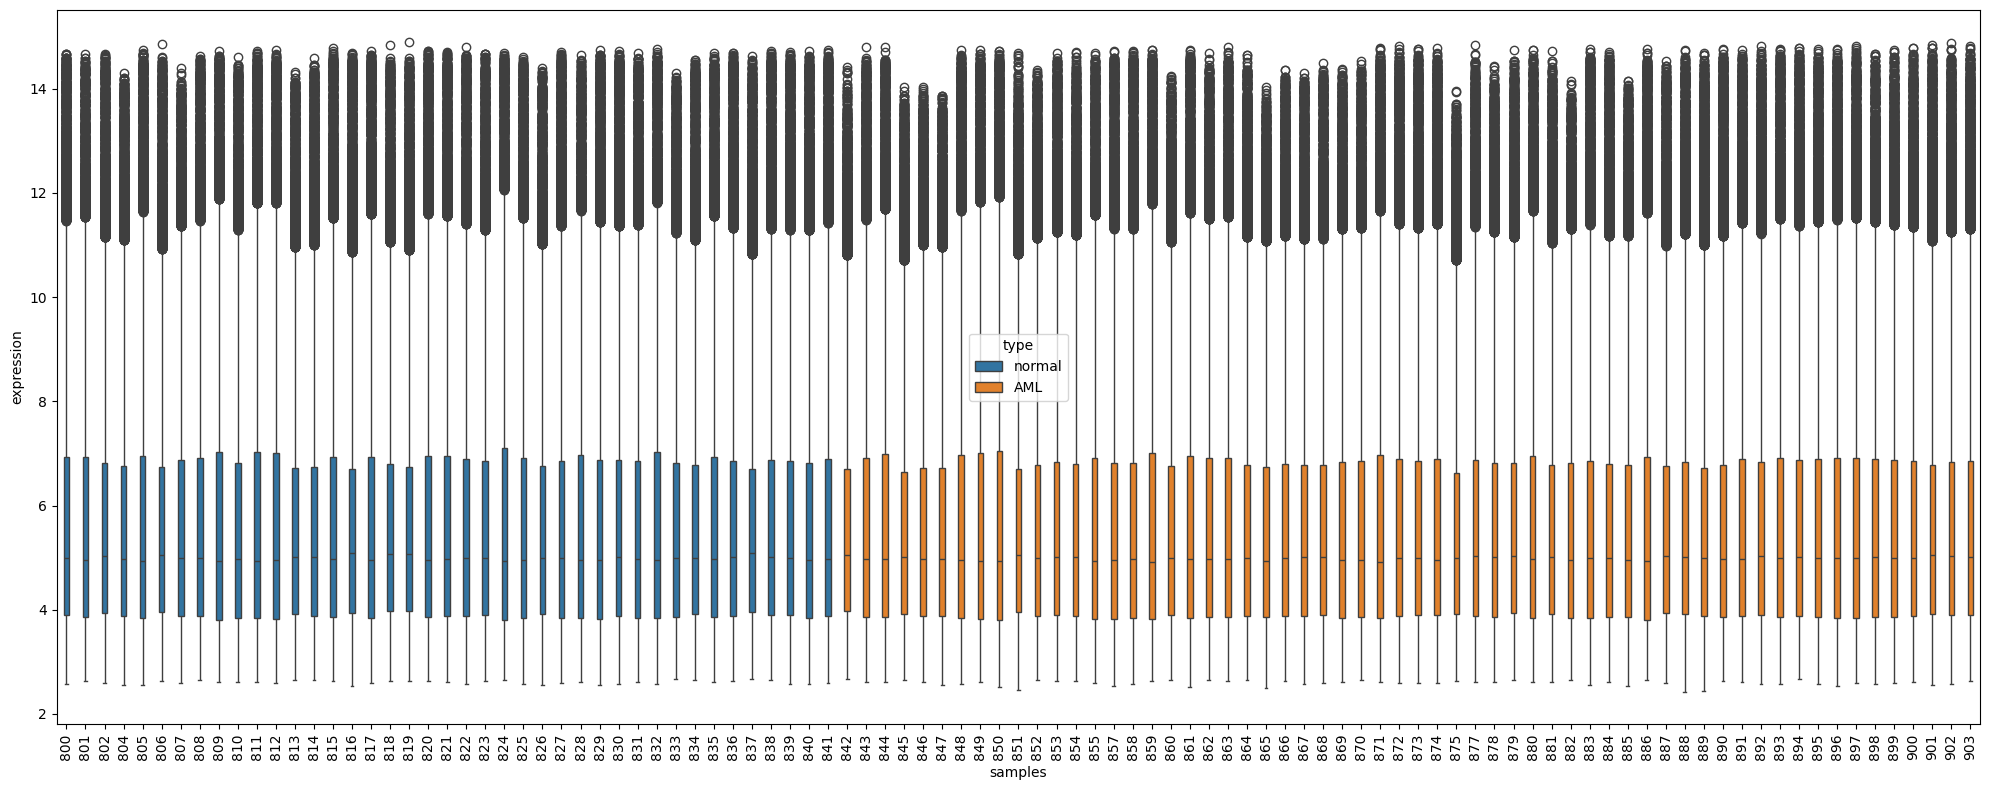

In [ ]:
plt.figure(figsize=(20, 8), ) 
sns.boxplot(x='samples', y='expression', hue = 'type',  data=leukemia_melt, width = 0.3)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [60]:
from functions import getListDifferentialGenes
getListDifferentialGenes(leukemia_melt, psig=0.05, tumor_value = 'AML', tumor_column = 'type')

ModuleNotFoundError: No module named 'functions'

In [6]:
#checking descriptive stats for raw data, normal and tumor type data
#leukemia_stats = leukemia_df.describe().T
#normal_type_stats = normal_type_df.describe().T
#tumor_type_stats = tumor_type_df.describe().T
#display(leukemia_stats)
#display(normal_type_stats)
#display(tumor_type_stats)

In [7]:
#checking the stats differences between normal and tumor type
#difference_bw_types = (normal_type_stats - tumor_type_stats).round(2)
#display(difference_bw_types)

In [11]:
#checking the amount of unique columns that has a skewness greater than 3 for normal type. 
normal_no_typecol = normal_type_df.drop(columns='type')
skew_higher_3 = []

for columns in normal_no_typecol:
    if normal_no_typecol[columns].skew() > 3:
        skew_higher_3.append(columns)
        
len(set(skew_higher_3))

276

In [13]:
def remove_outliers(df: pd.DataFrame):
    #This function takes as input a dataframe, and iterate through all the columns to remove the outliers using iqr method
    dict_col = {}
    for column in df.columns:
        values = df[column]
        iqr = np.percentile(df[column], 75) - np.percentile(df[column], 25)
        upper_whisker = np.percentile(df[column], 75) + 3 * iqr
        lower_whisker = np.percentile(df[column], 25) - 3 * iqr
        no_outliers = values[(values >= lower_whisker) & (values <= upper_whisker)]
        dict_col[column] = no_outliers
    no_outliers_df = pd.DataFrame(dict_col)
    return no_outliers_df

In [24]:
#I'll get 30 samples from each column to make a correlation
test_samples_normal = no_outliers_normal[:15]
test_samples_normal.shape

(15, 54676)

In [25]:
correlation = find_correlated_genes_optimized(test_samples_normal)

In [ ]:
#I'll get 30 samples from each column to make a correlation
test_samples_tumor = no_outliers_tumoral[:15]
test_samples_tumor.shape